In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [10]:
claimants = pd.read_csv("claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [11]:
claimants.drop(["CASENUM"],inplace=True,axis=1)

In [12]:
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [13]:
claimants.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [14]:
claimants.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [15]:
#CLMSEX fixing NA values
claimants.CLMSEX.value_counts()
claimants.CLMSEX=claimants.CLMSEX.fillna(1.0)

In [16]:
claimants.isna().sum()

ATTORNEY      0
CLMSEX        0
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [17]:
#CLMINSUR fixing NA values
claimants.CLMINSUR.value_counts()
claimants.CLMINSUR=claimants.CLMINSUR.fillna(1.0)

In [18]:
claimants.isna().sum()

ATTORNEY      0
CLMSEX        0
CLMINSUR      0
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [19]:
#SEATBELT fixing NA values
claimants.SEATBELT.value_counts()
claimants.SEATBELT=claimants.SEATBELT.fillna(0.0)

In [17]:
claimants.isna().sum()

ATTORNEY      0
CLMSEX        0
CLMINSUR      0
SEATBELT      0
CLMAGE      189
LOSS          0
dtype: int64

In [20]:
#CLMAGE fixing NA values
mean=claimants.CLMAGE.mean()
print("Mean:",mean)
claimants.CLMAGE=claimants.CLMAGE.fillna(mean)

Mean: 28.414422241529106


In [21]:
claimants.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [22]:
X1 = claimants.iloc[:,1:]
Y1 = claimants.iloc[:,0]

In [25]:
X1

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.000000,34.940
1,1.0,0.0,0.0,18.000000,0.891
2,0.0,1.0,0.0,5.000000,0.330
3,0.0,1.0,1.0,31.000000,0.037
4,0.0,1.0,0.0,30.000000,0.038
...,...,...,...,...,...
1335,0.0,1.0,0.0,28.414422,0.576
1336,1.0,1.0,0.0,46.000000,3.705
1337,1.0,1.0,0.0,39.000000,0.099
1338,1.0,0.0,0.0,8.000000,3.177


In [23]:
Y1

0       0
1       1
2       1
3       0
4       1
       ..
1335    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1340, dtype: int64

In [24]:
classifier = LogisticRegression()
classifier.fit(X1,Y1)

LogisticRegression()

In [28]:
y_pred = classifier.predict(X1)

In [25]:
y_pred_df= pd.DataFrame({'actual': Y1,
                         'predicted_prob': classifier.predict(X1)})

In [26]:
y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,1
4,1,1
...,...,...
1335,1,1
1336,0,0
1337,1,1
1338,0,0


In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y1,y_pred)
print (cm)

[[435 250]
 [147 508]]


In [30]:
import numpy as np
Accuracy=np.sum([cm[0,0],cm[1,1]])/np.sum(cm)
print(Accuracy)

0.7037313432835821


In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
print(classification_report(Y1,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       685
           1       0.67      0.78      0.72       655

    accuracy                           0.70      1340
   macro avg       0.71      0.71      0.70      1340
weighted avg       0.71      0.70      0.70      1340



In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(Y1, classifier.predict_proba (X1)[:,1])

Text(0, 0.5, 'True Positive Rate')

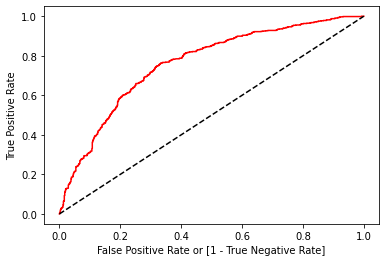

In [39]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [42]:
df_new=pd.DataFrame({"fpr":fpr,"tpr":tpr,"cutoff":thresholds})

In [43]:
df_new

,fpr,tpr,cutoff
0,0.000000,0.000000,1.768984e+00
1,0.000000,0.001527,7.689838e-01
2,0.000000,0.003053,7.669713e-01
3,0.001460,0.003053,7.582848e-01
4,0.001460,0.007634,7.557635e-01
...,...,...,...
548,0.931387,0.996947,4.201263e-02
549,0.931387,0.998473,4.038695e-02
550,0.992701,0.998473,1.435495e-11
551,0.992701,1.000000,7.996329e-12


In [46]:
df_new[df_new["fpr"]>=.27]

,fpr,tpr,cutoff
266,0.270073,0.671756,5.708228e-01
267,0.274453,0.671756,5.700653e-01
268,0.274453,0.674809,5.691918e-01
269,0.275912,0.674809,5.687199e-01
270,0.275912,0.676336,5.684924e-01
...,...,...,...
548,0.931387,0.996947,4.201263e-02
549,0.931387,0.998473,4.038695e-02
550,0.992701,0.998473,1.435495e-11
551,0.992701,1.000000,7.996329e-12


In [47]:
print(auc)

0.7053045077171672


In [32]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import test_train_split

ImportError: cannot import name 'test_train_split' from 'sklearn.model_selection' (C:\Users\Vidhya\anaconda3\lib\site-packages\sklearn\model_selection\__init__.py)

In [48]:
from sklearn.model_selection import train_test_split
train_x,test_x=train_test_split(X1,test_size=.3)
train_y,test_y=train_test_split(Y1,test_size=.3)

In [49]:
classifier=LogisticRegression()
classifier.fit(train_x,train_y)

LogisticRegression()

In [50]:
y_pred=classifier.predict(train_x)

In [51]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,

In [52]:
y_pred_df= pd.DataFrame({'actual': train_y,
                         'predicted_prob': classifier.predict(train_x)})

In [53]:
pd.crosstab(y_pred_df.actual,y_pred_df.predicted_prob)

predicted_prob,0,1
actual,,
0,272,211
1,235,220


In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(train_y,y_pred)
print (cm)

[[272 211]
 [235 220]]


In [55]:
import numpy as np
Accuracy=np.sum([cm[0,0],cm[1,1]])/np.sum(cm)
print(Accuracy)

0.5245202558635395


In [56]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
print(classification_report(train_y,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.56      0.55       483
           1       0.51      0.48      0.50       455

    accuracy                           0.52       938
   macro avg       0.52      0.52      0.52       938
weighted avg       0.52      0.52      0.52       938



In [57]:
auc = roc_auc_score(train_y, y_pred)

In [58]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(train_y, classifier.predict_proba (train_x)[:,1])

Text(0, 0.5, 'True Positive Rate')

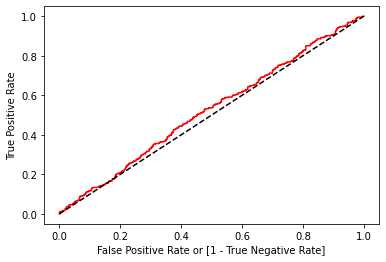

In [59]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [61]:
print(auc)

0.5233317407230451
